In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%pwd

'D:\\handson\\DAY7\\code\\data'

In [4]:
df = pd.read_csv("boston.csv")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [13]:
target = df.medv
cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat',]
data = df[ cols ]

In [14]:
# CRIM - per capita crime rate by town
#     price less
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
#     price less 
# RM - average number of rooms per dwelling
#     price more 
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
#     price less 
# MEDV - Median value of owner-occupied homes in $1000's


target.shape, data.shape
#13 features, 506 examples of those features


((506,), (506, 13))

In [30]:
y = target   # Regression
data.head()
std = StandardScaler()
std = std.fit(data)
X = std.transform(data)
pd.DataFrame(X, columns =cols).head()

crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

In [40]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [41]:
model = RandomForestRegressor() #LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9840525997978844

In [42]:
yHat = model.predict(X_test)
model.score(X_test, y_test)
X_test.shape
new_data = [-0.419782 ,0.284830 ,-1.287909 ,-0.272599 ,-0.144217 ,0.413672 ,-0.120013 ,0.140214 ,-0.982843 ,-0.666608 ,-1.459000 ,0.441052 ,-1.075562]
X_new = np.array(new_data).reshape(1,-1)
yHat_new = model.predict(X_new)
yHat_new
model.score(X_test, y_test)
#X_new = std.transform(np.array(new_data_which_is_raw).reshape(1,-1))

0.7930048512858638

In [ ]:
#Train score - .76, testscore - .63  <- R^2  

In [20]:
model.coef_

array([-1.01170421,  1.02558108, -0.03953238,  0.60731239, -1.80467996,
        2.64552328, -0.19783648, -3.018615  ,  2.0883816 , -1.90212879,
       -2.13154559,  0.77017134, -3.56070005])

In [24]:
dict(zip(cols, [float(e) for e in model.coef_]))

{'crim': -1.0117042095356168,
 'zn': 1.025581077654857,
 'indus': -0.039532376137576875,
 'chas': 0.6073123853208646,
 'nox': -1.8046799573238186,
 'rm': 2.6455232834373996,
 'age': -0.19783647749919098,
 'dis': -3.0186150011783535,
 'rad': 2.088381603833394,
 'tax': -1.902128787421239,
 'ptratio': -2.1315455887017336,
 'b': 0.7701713362571959,
 'lstat': -3.560700049004267}

## classification

In [59]:
iris = pd.read_csv("iris.csv")
target = iris.Name
data = iris.iloc[:, 0:4]
enc = LabelEncoder()
y = enc.fit_transform(target)
X = data.copy()
X.head()
st = StandardScaler()
lr = LogisticRegression()
pipeline = Pipeline([('st', st),('lr', lr)])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape
pipeline.fit(X_train, y_train)
print(f"""{pipeline.score(X_train, y_train)= },
{pipeline.score(X_test, y_test)=}""")
#hyperparameter tuning 
pg = dict(lr__C = [0.1,1.0,10,100])
gs = GridSearchCV(pipeline, pg, cv=5)  # KFold=5
#gs= RandomizedSearchCV(pipeline, pg, cv=5) # for very high parameter space 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
gs.fit(X_train, y_train)
best_model = gs.best_estimator_
print(f"""{best_model.score(X_train, y_train)= },
{best_model.score(X_test, y_test)=}""")
gs.best_params_  #C=10
#Tune models
pg = dict(lr = [LogisticRegression(), RandomForestClassifier()])
gs = GridSearchCV(pipeline, pg, cv=5)  # KFold=5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
gs.fit(X_train, y_train)
best_model = gs.best_estimator_
print(f"""{best_model.score(X_train, y_train)= },
{best_model.score(X_test, y_test)=}""")
gs.best_params_  #C=10
#confusion metrics
yHat = best_model.predict(X)
confusion_matrix(y,yHat)

pipeline.score(X_train, y_train)= 0.9732142857142857,
pipeline.score(X_test, y_test)=0.9736842105263158
best_model.score(X_train, y_train)= 0.9788732394366197,
best_model.score(X_test, y_test)=1.0
best_model.score(X_train, y_train)= 1.0,
best_model.score(X_test, y_test)=1.0


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [44]:
data.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

In [45]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

## Spam filtering 

In [61]:
sp = pd.read_csv("spam.csv", encoding='latin-1')
sp.head()
lenc = LabelEncoder()
X_raw = sp.iloc[:, 1]
y_raw = sp.iloc[:, 0]
lenc = lenc.fit(y_raw)
y = lenc.transform(y_raw)
tf = TfidfVectorizer()
tf = tf.fit(X_raw)
X = tf.transform(X_raw )

X_train, X_test, y_train, y_test = train_test_split(
        X,y, random_state=0) 
param_grid = dict(C= [0.001, 0.1, 1, 10, 100])
clf= LogisticRegression()
gs = GridSearchCV(clf, param_grid) 
gs.fit(X_train, y_train)
print(gs.best_params_) 
gs.score(X_train, y_train)
gs.score(X_test, y_test)

{'C': 100}


0.9791816223977028

In [68]:
#new data 
X_new_raw = np.array(["How are you", "You won a lottery"])
X_new = tf.transform(X_new_raw)
X.shape, X_new.shape
yHat = gs.predict(X_new)
lenc.inverse_transform(yHat)

array(['ham', 'spam'], dtype=object)

In [72]:
sp = pd.read_csv("spam.csv", encoding='latin-1')
sp.head()
lenc = LabelEncoder()
X_raw = sp.iloc[:, 1]
y_raw = sp.iloc[:, 0]
lenc = lenc.fit(y_raw)
y = lenc.transform(y_raw)
tf = TfidfVectorizer()
clf= LogisticRegression()
p = Pipeline([('tf', tf),('lr', clf)])
pg = dict(lr__C= [0.001, 0.1, 1, 10, 100])
gs = GridSearchCV(p, pg, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
        X_raw,y, random_state=0)         
gs.fit(X_train, y_train)
gs.score(X_train, y_train)
gs.score(X_test, y_test)
X_new_raw = np.array(["How are you", "You won a lottery"])
yHat = gs.predict(X_new_raw)
lenc.inverse_transform(yHat)

array(['ham', 'spam'], dtype=object)

In [64]:
from tensorflow import keras
import numpy as np
from keras import layers
from keras.models import Sequential

<function keras.src.layers.core.input_layer.Input(shape=None, batch_size=None, dtype=None, sparse=None, ragged=None, batch_shape=None, name=None, tensor=None, optional=False)>


SVM-Kernels

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.



---------------- SVC of binary class ------------------

Some properties of Classifier
-------------------------------
clf.coef_       
    Coefficients for each feature 
    only for linear problem
clf.support_
    SupportVectorIndices 
    Vector of indices that specify the rows in the training data X, 
    that were selected as support vectors 
clf.support_vectors_  
    are subset of features (rows of X) which are used for decision boundary
clf.n_support_ 
    get number of support vectors for each class

clf.decision_function
    decision function that tells us how close to the seperating line we are 
    (close to the boundary means a low-confidence decision)
    Returns (n_samples, n_classes * (n_classes-1) / 2) for ovo, 
    for ovr, the shape is (n_samples, n_classes).
    each value is proportional to the dist

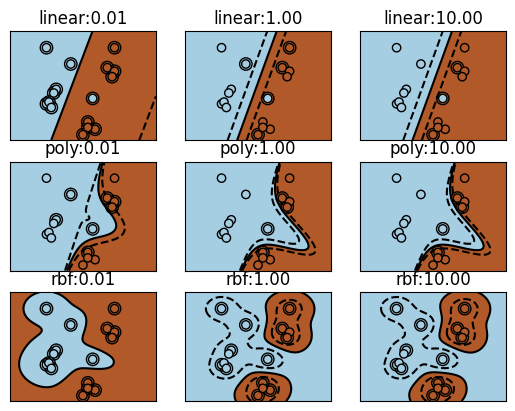

In [73]:
%run ..\5.1.plot_svm_kernels.py

In [74]:
%run ..\6.1.decision_tree.py

------------------------ iris data DecisionTreeClassifier ---------
With entropy
check default value of all params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Training Accuracy 1.0
Test data Accuracy 0.9736842105263158
Predicted class for test data ...
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
the probability of each class can be predicted(test data)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [88]:
td = np.array([ [0,0],[0,1],[1,0],[1,1]])
target = np.array([[0], [1], [1], [0]])  #xor 
model = Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model.fit(td, target, epochs=100, verbose=2)
scores = model.evaluate(td, target)
scores
predictions = model.predict(td)
predictions
print([round(x[0]) for x in predictions])
#HOSTEL WORK - https://keras.io/examples/vision/mnist_convnet/

Epoch 1/100
1/1 - 1s - 697ms/step - binary_accuracy: 0.5000 - loss: 0.2539
Epoch 2/100
1/1 - 0s - 62ms/step - binary_accuracy: 0.5000 - loss: 0.2534
Epoch 3/100
1/1 - 0s - 63ms/step - binary_accuracy: 0.5000 - loss: 0.2530
Epoch 4/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.5000 - loss: 0.2525
Epoch 5/100
1/1 - 0s - 69ms/step - binary_accuracy: 0.5000 - loss: 0.2521
Epoch 6/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.5000 - loss: 0.2516
Epoch 7/100
1/1 - 0s - 69ms/step - binary_accuracy: 0.5000 - loss: 0.2512
Epoch 8/100
1/1 - 0s - 63ms/step - binary_accuracy: 0.5000 - loss: 0.2507
Epoch 9/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.5000 - loss: 0.2502
Epoch 10/100
1/1 - 0s - 69ms/step - binary_accuracy: 0.5000 - loss: 0.2498
Epoch 11/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.5000 - loss: 0.2494
Epoch 12/100
1/1 - 0s - 53ms/step - binary_accuracy: 0.5000 - loss: 0.2489
Epoch 13/100
1/1 - 0s - 63ms/step - binary_accuracy: 0.5000 - loss: 0.2485
Epoch 14/100
1/1 - 0s - 53ms/step

In [81]:
target

array([[0],
       [1],
       [1],
       [0]])